**What is K-Means Clustering?**

K-Means clustering is an unsupervised learning algorithm used to partition a set of observations into K clusters, where each observation belongs to the cluster with the nearest mean. It's widely used for grouping data into different categories based on feature similarities.

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/adult.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Steps Involved in K-Means Clustering:

* Initialization: Choose K initial centroids (either randomly or using a heuristic).
* Assignment: Assign each data point to the nearest centroid.
* Update: Recalculate centroids as the mean of all data points assigned to that cluster.
* Repeat: Repeat the assignment and update steps until convergence (when centroids no longer change significantly).

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import numpy as np

# Handling missing values: replacing '?' with NaN
data.replace('?', np.nan, inplace=True)

# Imputing missing values with the mode (most frequent value) for categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
imputer = SimpleImputer(strategy='most_frequent')
data[categorical_columns] = imputer.fit_transform(data[categorical_columns])

# Numerical encoding of categorical data
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.select_dtypes(include=['int64', 'float64']))

# Display the first few rows of the processed data
pd.DataFrame(scaled_data, columns=data.select_dtypes(include=['int64', 'float64']).columns).head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,-0.995129,-0.089727,0.351675,-2.397350,-1.197259,0.916138,-0.038505,0.971649,-1.971746,0.70422,-0.144804,-0.217127,-0.034087,0.259694,-0.560845
1,-0.046942,-0.089727,-0.945524,0.183660,-0.419335,-0.410397,-0.542436,-0.900852,0.392384,0.70422,-0.144804,-0.217127,0.772930,0.259694,-0.560845
2,-0.776316,-1.890234,1.394723,-0.848744,0.747550,-0.410397,0.969357,-0.900852,0.392384,0.70422,-0.144804,-0.217127,-0.034087,0.259694,1.783024
3,0.390683,-0.089727,-0.277844,1.216063,-0.030373,-0.410397,-0.038505,-0.900852,-1.971746,0.70422,0.886874,-0.217127,-0.034087,0.259694,1.783024
4,-1.505691,-0.089727,-0.815954,1.216063,-0.030373,0.916138,0.717391,0.971649,0.392384,-1.42001,-0.144804,-0.217127,-0.841104,0.259694,-0.560845


All three code cells are identical and follow these steps:
* Cluster Counts: cluster_counts = [2, 3, 4, 5, 6] sets the number of clusters for K-Means to try.
* KMeans Models: kmeans_models = [KMeans(n_clusters=k, random_state=0).fit(scaled_data) for k in cluster_counts] creates a list of KMeans models for each k in cluster_counts. Each model is fitted to scaled_data.
* Plotting: Each subplot shows the clustering result for a different k. Data points are colored based on their assigned cluster, and red crosses represent cluster centers.
* Axes Labels: 'Scaled Feature 1' and 'Scaled Feature 2' refer to the first two features of the scaled dataset.
* Purpose: These cells visualize how data points are grouped into different numbers of clusters, helping in the analysis of the appropriate number of clusters for the dataset.

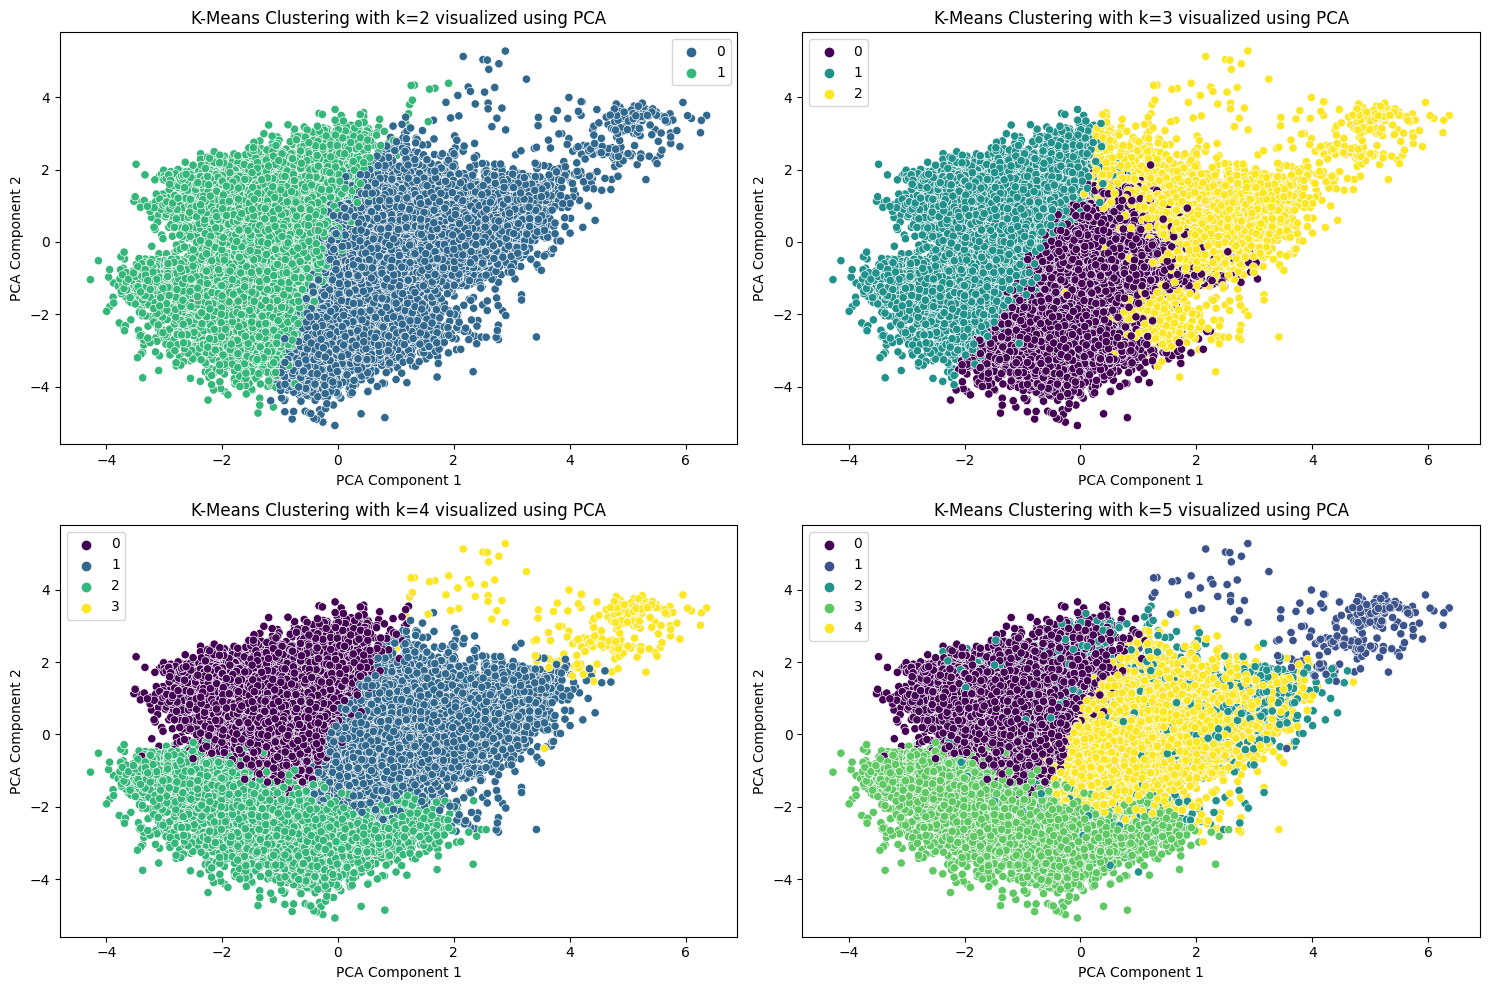

In [ ]:
from sklearn.decomposition import PCA

# Define PCA and transform data
pca = PCA(n_components=2)  # Adjust n_components as needed
pca_result = pca.fit_transform(scaled_data)

# Now you can proceed with your plotting code
plt.figure(figsize=(15, 10))
for k in k_values:
    plt.subplot(2, 2, k-1)
    sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=clusterings_simplified[k], palette='viridis')
    plt.title(f'K-Means Clustering with k={k} visualized using PCA')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

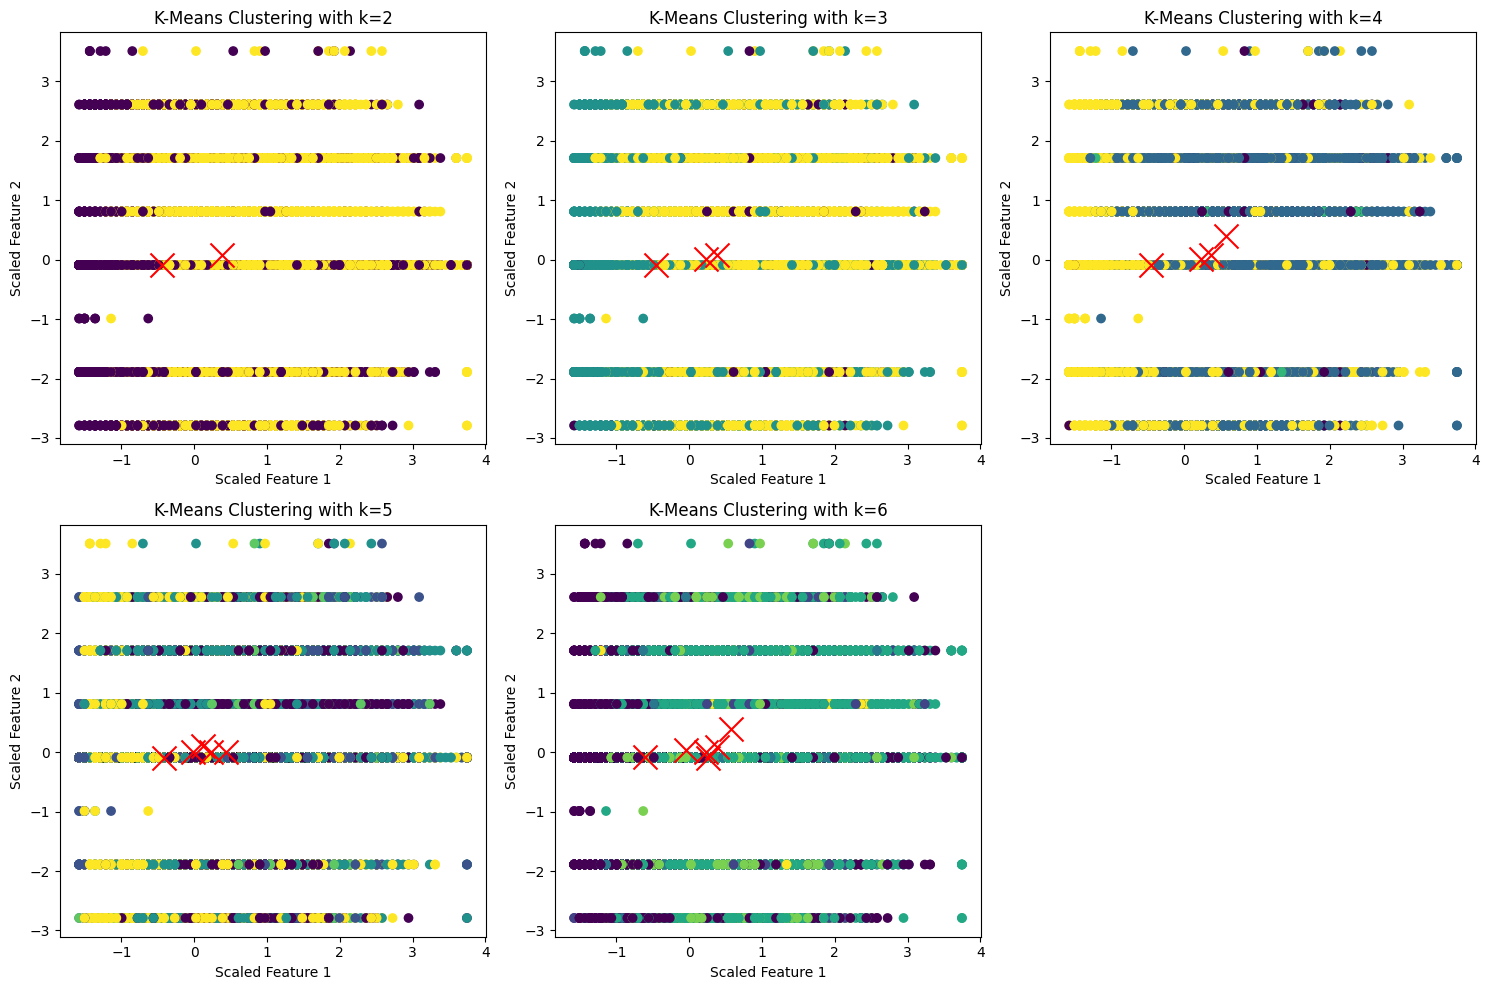

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Applying K-Means clustering with different numbers of clusters
cluster_counts = [2, 3, 4, 5, 6]
kmeans_models = [KMeans(n_clusters=k, random_state=0).fit(scaled_data) for k in cluster_counts]

# Plotting the cluster centers for each k
plt.figure(figsize=(15, 10))
for i, model in enumerate(kmeans_models):
    plt.subplot(2, 3, i + 1)
    plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=model.labels_, cmap='viridis', marker='o')
    plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=300, c='red', marker='x')
    plt.title(f'K-Means Clustering with k={cluster_counts[i]}')
    plt.xlabel('Scaled Feature 1')
    plt.ylabel('Scaled Feature 2')

plt.tight_layout()
plt.show()


In [ ]:
# Standard K-Means with k-means++ initialization (default)
kmeans_plus = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(scaled_data)

# Standard K-Means with random initialization
kmeans_random = KMeans(n_clusters=3, init='random', random_state=0).fit(scaled_data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


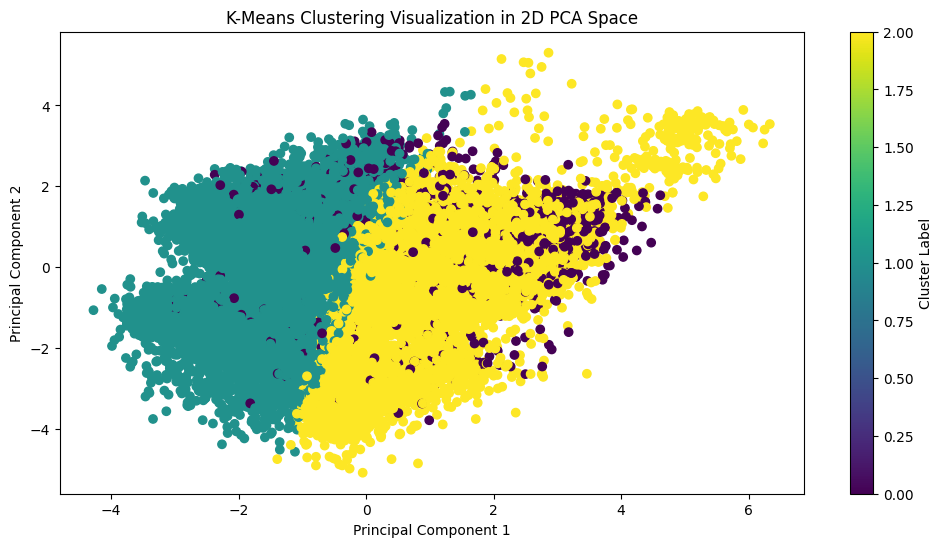

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Applying K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(scaled_data)

# Reducing the dimensionality of the dataset for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Visualizing the clusters in the reduced two-dimensional space
plt.figure(figsize=(12, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('K-Means Clustering Visualization in 2D PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


* The visualization above shows the results of K-Means clustering reduced to two dimensions using PCA (Principal Component Analysis). The points are colored according to their assigned cluster label. This 2D representation provides a visual interpretation of how the data points are grouped into clusters by the K-Means algorithm.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


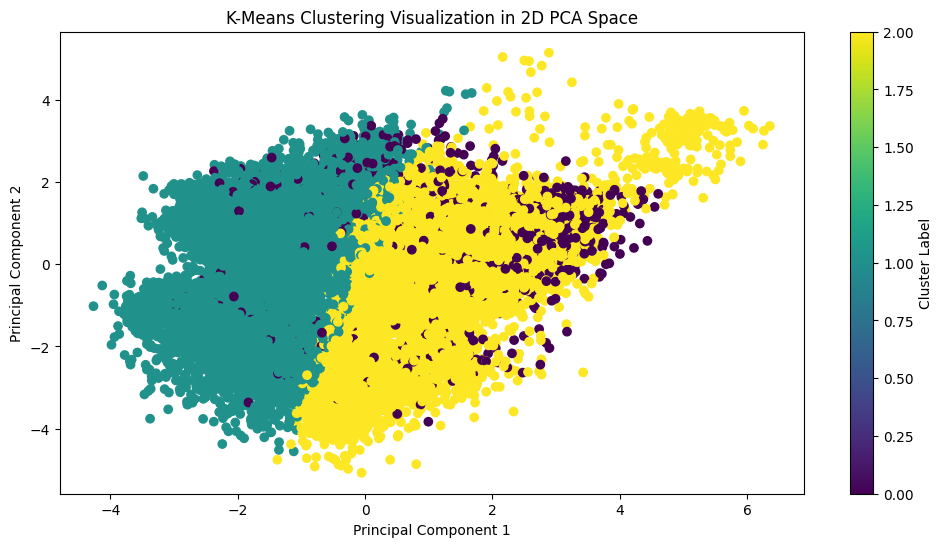

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Applying K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(scaled_data)

# Reducing the dimensionality of the dataset for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Visualizing the clusters in the reduced two-dimensional space
plt.figure(figsize=(12, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('K-Means Clustering Visualization in 2D PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


The visualization above demonstrates K-Means clustering based on two specific features from the dataset: 'age' and 'hours-per-week'. These features were chosen as they are likely significant in determining income levels, a key aspect of this dataset. The data points are colored according to their cluster assignment, showing how the clustering algorithm groups individuals based on their age and the number of hours they work per week.

This type of feature-specific visualization helps in understanding the characteristics of each cluster and can provide insights into the underlying patterns within the dataset. For example, you might observe clusters formed around different age groups or work hours, which could be indicative of certain socioeconomic segments.